### Análise de dados temporáis do Coronavirus

[worldometers com estatíticas sobre o coronavirus](https://www.worldometers.info/coronavirus/)

[link da origem do dados no github](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

Esta pasta contém tabelas de resumo de séries temporais diárias, incluindo confirmados, óbitos e recuperados. Todos os dados são lidos a partir do relatório diário do caso. As tabelas de séries temporais estão sujeitas a atualização caso sejam identificadas imprecisões em nossos dados históricos.

Duas tabelas de séries temporais são para os casos e mortes confirmados nos EUA, relatados no nível do condado. Eles são nomeados:
* time_series_covid19_confirmed_US.csv;
* time_series_covid19_deaths_US.csv.

Três tabelas de séries temporais são para os casos confirmados globais, casos recuperados e mortes. Austrália, Canadá e China são relatados em nível de província/estado. As dependências da Holanda, Reino Unido, França e Dinamarca estão listadas no nível de província/estado. Os EUA e outros países estão no nível de país. As tabelas são renomeadas como:
* time_series_covid19_confirmed_global.csv;
* time_series_covid19_deaths_global.csv;
* time_series_covid19_recovered_global.csv.

Frequência de atualização:
* Uma vez por dia por volta das 23:59 (UTC).

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Leitura dos dados do arquivo (time_series_covid19_confirmed_global.csv)
Casos confirmados de infecção global</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [2]:
df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,171931,172205,172441,172716,172901,173047,173084,173146,173395,173659
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,269904,270164,270370,270455,270734,270947,271141,271141,271527,271563
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,263936,264054,264201,264365,264488,264603,264706,264778,264855,264936
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,37589,37589,37589,37820,37901,37958,37999,37999,37999,37999
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98617,98638,98658,98671,98698,98701,98701,98701,98701,98741


In [3]:
df_confirmados.shape

(284, 773)

In [4]:
print(f'Quantidade de países presentes no arquivo - {df_confirmados["Country/Region"].unique().shape[0]}')


Quantidade de países presentes no arquivo - 198


In [5]:
print('Lista de países que compõe a base de dados:', end='\n\n')
_ = [print(f'{pais: <33}', end='') for pais in df_confirmados["Country/Region"].unique()]

Lista de países que compõe a base de dados:

Afghanistan                      Albania                          Algeria                          Andorra                          Angola                           Antarctica                       Antigua and Barbuda              Argentina                        Armenia                          Australia                        Austria                          Azerbaijan                       Bahamas                          Bahrain                          Bangladesh                       Barbados                         Belarus                          Belgium                          Belize                           Benin                            Bhutan                           Bolivia                          Bosnia and Herzegovina           Botswana                         Brazil                           Brunei                           Bulgaria                         Burkina Faso                     Burma                          

### Seleção de todas as datas presentes no dataframe

In [6]:
col_datas = df_confirmados.columns.tolist()[4:]
print(f'5 últimas data: {col_datas[-5:]}')

5 últimas data: ['2/24/22', '2/25/22', '2/26/22', '2/27/22', '2/28/22']


### Alguns países apresentam informações por Province/State	

In [7]:
filtro = df_confirmados['Country/Region'].value_counts() > 1
filtro[filtro.values]

China             True
Canada            True
United Kingdom    True
France            True
Australia         True
Netherlands       True
Denmark           True
New Zealand       True
Name: Country/Region, dtype: bool

### Sumarização para que seja apresentado totais por país

In [8]:
df_confirmados_by_country = df_confirmados[2:].groupby('Country/Region')[col_datas].sum()
df_confirmados_by_country.sample(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Marshall Islands,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
Central African Republic,0,0,0,0,0,0,0,0,0,0,...,14187,14187,14187,14187,14187,14187,14187,14187,14187,14225
Austria,0,0,0,0,0,0,0,0,0,0,...,2424742,2473099,2494535,2515962,2550371,2578962,2610286,2636258,2659532,2679742
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,233224,233352,233571,233980,234589,234967,235467,235803,235803,236380
Guatemala,0,0,0,0,0,0,0,0,0,0,...,756600,757588,758303,762096,766475,770135,773575,776262,776991,776991
Russia,0,0,0,0,0,0,0,0,0,2,...,14979363,15147762,15297628,15430540,15566425,15697674,15819594,15941241,16055851,16161596
Sudan,0,0,0,0,0,0,0,0,0,0,...,59939,59939,61223,61251,61350,61376,61376,61376,61376,61458
Peru,0,0,0,0,0,0,0,0,0,0,...,3490988,3496009,3497896,3500880,3503892,3506075,3508642,3512404,3516264,3517260
Guinea,0,0,0,0,0,0,0,0,0,0,...,36354,36354,36393,36393,36393,36393,36393,36393,36393,36397


### Gráfico apresentando a curva de casos confirmado no Brasil

In [9]:
quantidade_acumulada_atual = df_confirmados_by_country.loc['Brazil'][-1]
print(f'O número de casos acumulados até o momento é de - {quantidade_acumulada_atual}')

O número de casos acumulados até o momento é de - 28796571


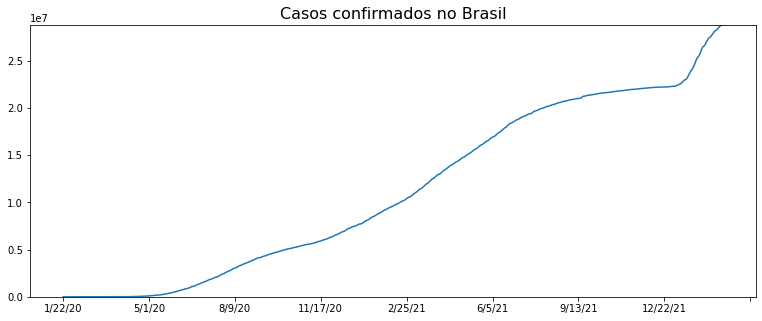

In [10]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil", fontsize=16)
df_confirmados_by_country.loc['Brazil'].plot()
plt.ylim(0, df_confirmados_by_country.loc['Brazil'][-1])
plt.show()

### Calculando a quantidade de casos confirmados por dia no Brasil
Calculando a diferença entre um dia e o dia anterior

In [11]:
minimo = min(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Atenção a um possível erro na base de dados.')
print(f'Menor quantidade de casos confirmados em um dia - {minimo:.0f}')

Atenção a um possível erro na base de dados.
Menor quantidade de casos confirmados em um dia - -19796


In [12]:
maximo = max(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Maior quantidade de casos confirmados em um dia - {maximo:.0f}')

Maior quantidade de casos confirmados em um dia - 287149


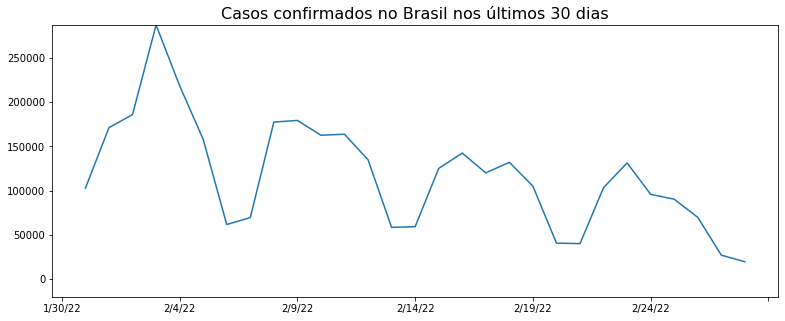

In [13]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil nos últimos 30 dias", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'][-30:].diff().plot()
plt.show()

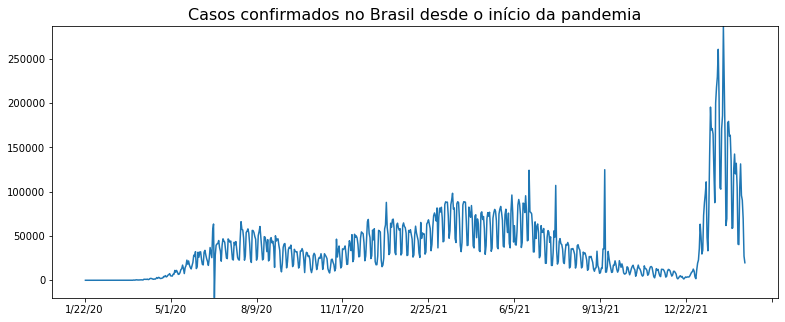

In [14]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil desde o início da pandemia", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'].diff().plot()
plt.show()

### Comparativo entre todos os países até o momento

In [15]:
paises_maior_quantidade_casos_confirmados = df_confirmados_by_country[col_datas[-1]].sort_values(ascending=False)
paises_maior_quantidade_casos_confirmados[:30]

Country/Region
US                79045043
India             42931045
Brazil            28796571
France            22877926
United Kingdom    19021076
Russia            16161596
Germany           14912626
Turkey            14089456
Italy             12782836
Spain             10977524
Argentina          8900656
Iran               7051429
Netherlands        6535520
Colombia           6064583
Poland             5667054
Indonesia          5564448
Mexico             5508629
Ukraine            5040518
Japan              5005881
South Africa       3674042
Philippines        3661997
Israel             3634503
Czechia            3574328
Belgium            3557314
Peru               3517260
Vietnam            3443485
Malaysia           3442736
Canada             3291827
Korea, South       3273449
Portugal           3262618
Name: 2/28/22, dtype: int64

In [16]:
acumulado_confirmados = paises_maior_quantidade_casos_confirmados.sum()

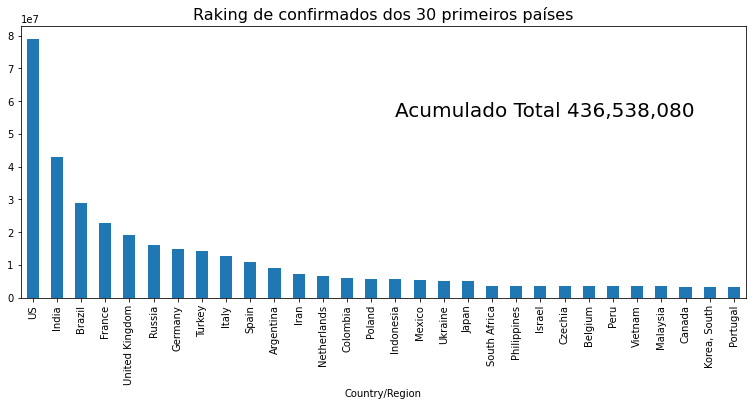

In [17]:
plt.figure(figsize=(13, 5))
plt.title("Raking de confirmados dos 30 primeiros países", fontsize=16)
plt.ylim(0, paises_maior_quantidade_casos_confirmados[0] * 1.05)
plt.annotate(f'Acumulado Total {acumulado_confirmados:,}', xy=(15, paises_maior_quantidade_casos_confirmados[0]*0.7), fontsize=20)
paises_maior_quantidade_casos_confirmados[:30].plot(kind='bar')
plt.show()

### Comparativo dos nove países com mais casos confirmados com o restante do mundo

In [18]:
# nome dos nove países com mais casos confirmados de covid
nove_pais_mais_confirmados = paises_maior_quantidade_casos_confirmados[:9].index

In [19]:
df_confirmados['Filtro'] = [pais if pais in nove_pais_mais_confirmados else 'Outros países' for pais  in df_confirmados['Country/Region']]

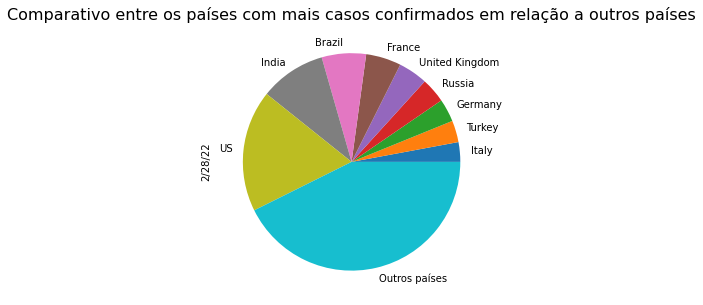

In [20]:
plt.figure(figsize=(13, 5))
plt.title("Comparativo entre os países com mais casos confirmados em relação a outros países", fontsize=16)
df_confirmados.groupby('Filtro')[col_datas[-1]].sum().sort_values().plot(kind='pie')
plt.show()

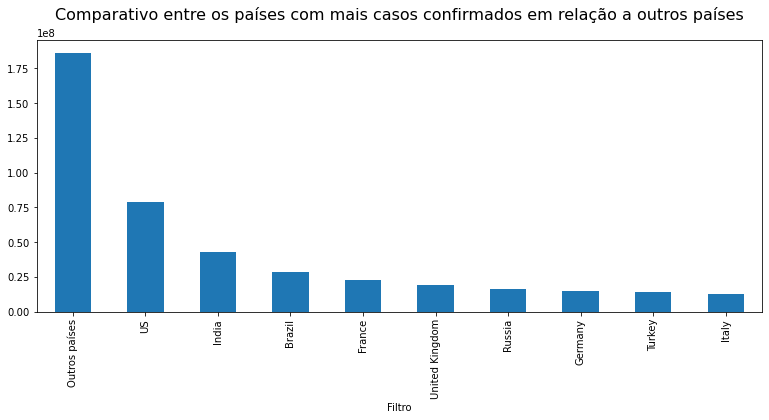

In [21]:
plt.figure(figsize=(13, 5))
plt.title("Comparativo entre os países com mais casos confirmados em relação a outros países", fontsize=16, pad=20)
df_confirmados.groupby('Filtro')[col_datas[-1]].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Leitura dos dados do arquivo (time_series_covid19_deaths_global.csv)¶
Casos de mortes globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [22]:
df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_mortes.head()    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7534,7539,7549,7569,7574,7578,7579,7585,7593,7598
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3433,3438,3445,3451,3453,3457,3458,3458,3464,3469
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6787,6797,6805,6812,6816,6820,6823,6828,6831,6835
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,150,150,150,151,151,151,151,151,151,151
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1899,1899,1899,1899,1899,1899,1899,1899,1899,1900


### Leitura dos dados do arquivo (time_series_covid19_recovered_global.csv)¶
Casos recuperados globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [23]:
df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recuperados.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sumarização dos novos dados por país

In [24]:
df_mortes_by_country = df_mortes[2:].groupby('Country/Region')[col_datas].sum()
df_mortes_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Gabon,0,0,0,0,0,0,0,0,0,0,...,303,303,303,303,303,303,303,303,303,303
Czechia,0,0,0,0,0,0,0,0,0,0,...,38188,38226,38335,38335,38403,38433,38491,38558,38592,38592
Equatorial Guinea,0,0,0,0,0,0,0,0,0,0,...,182,182,182,182,182,182,182,182,182,182
Syria,0,0,0,0,0,0,0,0,0,0,...,3047,3050,3053,3056,3059,3062,3065,3068,3071,3075
Iceland,0,0,0,0,0,0,0,0,0,0,...,58,58,58,61,60,61,61,61,61,62


In [25]:
df_recuperados_by_country = df_recuperados[2:].groupby('Country/Region')[col_datas].sum()
df_recuperados_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Papua New Guinea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moldova,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sri Lanka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
San Marino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizando crescimento dos casos de mortes e de recuperados no Brasil 

In [26]:
acumulado_mortes = df_mortes_by_country.loc["Brazil"][-1]

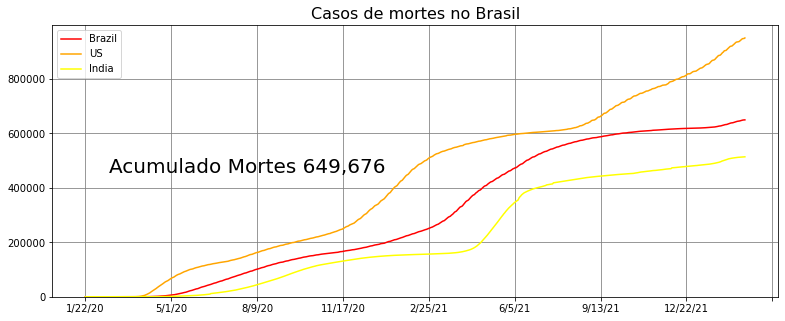

In [27]:
plt.figure(figsize=(13, 5))

plt.title("Casos de mortes no Brasil", fontsize=16)

plt.annotate(f'Acumulado Mortes {acumulado_mortes:,}', xy=(28, acumulado_mortes*0.7), fontsize=20)

df_mortes_by_country.loc['Brazil'].plot(color='red')
df_mortes_by_country.loc['US'].plot(color='orange')
df_mortes_by_country.loc['India'].plot(color='yellow')

plt.legend()

plt.grid(color='gray')

plt.ylim(0)
plt.show()

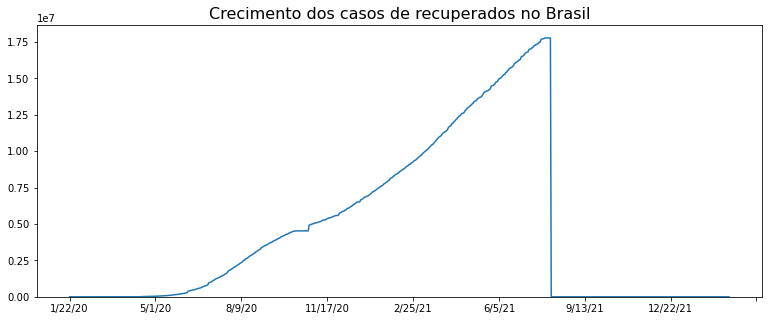

In [28]:
plt.figure(figsize=(13, 5))
plt.title("Crecimento dos casos de recuperados no Brasil", fontsize=16)
df_recuperados_by_country.loc['Brazil'].plot()
plt.ylim(0, max(df_recuperados_by_country.loc['Brazil']) * 1.05)
plt.show()

* <font color='red'>Observamos que totais de recuperados não são mais reportados.</font>

### Concatenando informações do último dia

In [29]:
print(f'Data do último dia disponibilizadob - {col_datas[-1]}')

Data do último dia disponibilizadob - 2/28/22


In [30]:
df_ultimo_dia = pd.concat(
    [
        df_confirmados_by_country[col_datas[-1]],
        df_recuperados_by_country[col_datas[-1]],
        df_mortes_by_country[col_datas[-1]]
    ],
    axis='columns'
)

df_ultimo_dia.columns = ['Confirmados', 'Recuperados', 'Mortes']

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes
Country/Region,,,
Diamond Princess,712,0,13
Cabo Verde,55886,0,401
Jordan,1631708,0,13835
Bahamas,33135,0,771
Czechia,3574328,0,38592


### Calculando letalidade da Covid-19

In [31]:
percentual_letalidade = df_ultimo_dia.Mortes.sum() / df_ultimo_dia.Confirmados.sum()

print(f'A letalidade da covid-19 no mundo é de {(percentual_letalidade * 100):.3f}%')

A letalidade da covid-19 no mundo é de 1.362%


In [32]:
df_ultimo_dia['Letalidade %'] = (df_ultimo_dia.Mortes / df_ultimo_dia.Confirmados) * 100

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
Ireland,1300422,0,6497,0.499607
Angola,98741,0,1900,1.924226
Monaco,9359,0,51,0.544930
Togo,36798,0,272,0.739171
Italy,12782836,0,154767,1.210741


In [33]:
print('Letalidade no Brasil')
pd.DataFrame(df_ultimo_dia.loc['Brazil']).T

Letalidade no Brasil


,Confirmados,Recuperados,Mortes,Letalidade %
Brazil,28796571.0,0.0,649676.0,2.256088


### Raking de letalidade da Covid-19

In [34]:
paises_maior_letalidade = df_ultimo_dia['Letalidade %'].sort_values(ascending=False)

for ind, pais in enumerate(paises_maior_letalidade.index):
    if pais == 'Brazil':
        print(f'{pais} na posição {ind+1}')

Brazil na posição 42


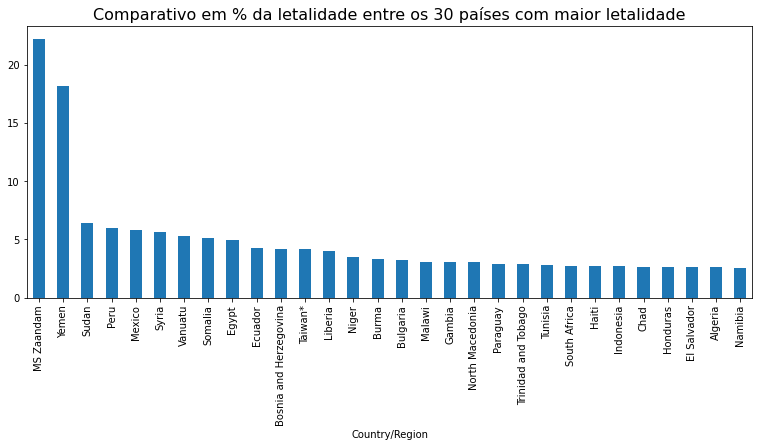

In [35]:
plt.figure(figsize=(13, 5))
plt.title("Comparativo em % da letalidade entre os 30 países com maior letalidade", fontsize=16)
plt.ylim(0, paises_maior_letalidade[0] * 1.05)
paises_maior_letalidade[:30].plot(kind='bar')
plt.show()

In [36]:
df_ultimo_dia.loc[paises_maior_letalidade.index[:10]]

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
MS Zaandam,9,0,2,22.222222
Yemen,11771,0,2135,18.137796
Sudan,61458,0,3908,6.358814
Peru,3517260,0,210672,5.989662
Mexico,5508629,0,318149,5.775466
Syria,54575,0,3075,5.634448
Vanuatu,19,0,1,5.263158
Somalia,26313,0,1348,5.122943
Egypt,483771,0,24074,4.976321


### Visualizando se existe relação entre Confirmados e Mortes

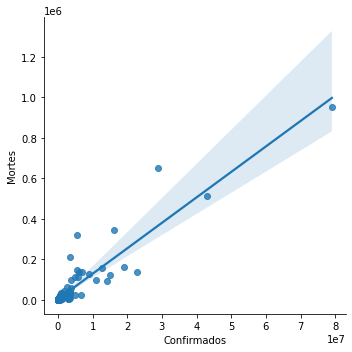

In [37]:
sns.lmplot(data=df_ultimo_dia, x='Confirmados', y='Mortes')

### rugplot - assemelha ao distplot demonstrando onde há maior a concentraçao

<AxesSubplot:xlabel='Letalidade %', ylabel='Density'>

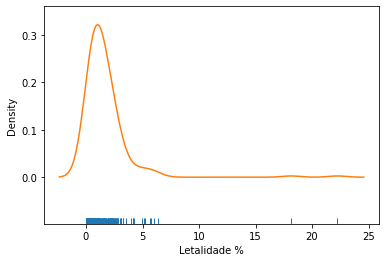

In [38]:
sns.rugplot(df_ultimo_dia['Letalidade %'])
sns.kdeplot(df_ultimo_dia['Letalidade %']) # Confirmando a maior concentração

<AxesSubplot:xlabel='Letalidade %', ylabel='Count'>

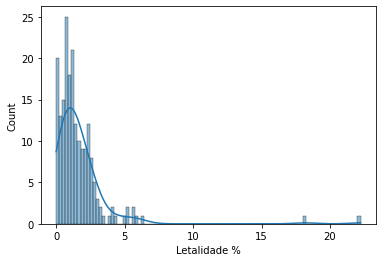

In [39]:
sns.histplot(df_ultimo_dia['Letalidade %'], bins=100, kde=True)

### Casos novos no último dia

In [40]:
paises_novos_casos = df_confirmados_by_country.diff(axis=1)[col_datas[-1]].sort_values(ascending=False)[:30].index
paises_novos_casos

Index(['Korea, South', 'Germany', 'Vietnam', 'US', 'Russia', 'Netherlands',
       'United Kingdom', 'Turkey', 'Japan', 'Switzerland', 'China',
       'New Zealand', 'Australia', 'Indonesia', 'Malaysia', 'Austria',
       'Brazil', 'Chile', 'Italy', 'Denmark', 'Greece', 'France', 'Singapore',
       'Belgium', 'Iran', 'Norway', 'Israel', 'El Salvador', 'Canada',
       'Hungary'],
      dtype='object', name='Country/Region')

<AxesSubplot:title={'center':'Países com maior número de casos no último dia'}, xlabel='Country/Region'>

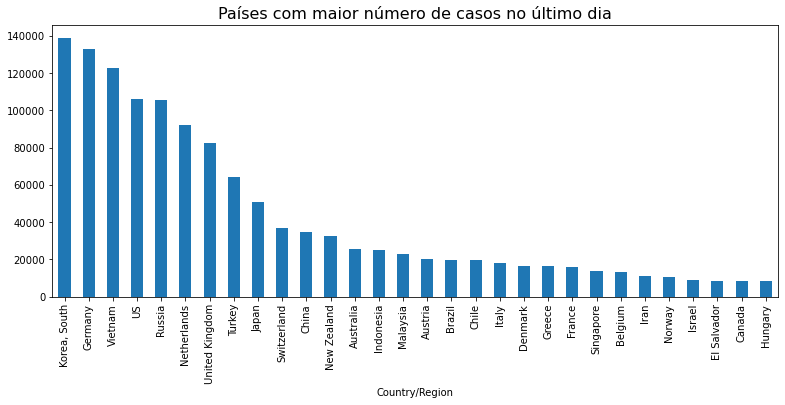

In [41]:
plt.figure(figsize=(13, 5))
plt.title("Países com maior número de casos no último dia", fontsize=16)
df_confirmados_by_country.diff(axis=1)[col_datas[-1]].sort_values(ascending=False)[:30].plot(kind='bar')

In [42]:
df_paises_novos_casos = df_confirmados_by_country.loc[paises_novos_casos[:10]][col_datas[-20:]].diff(axis=1).dropna(axis=1)
df_paises_novos_casos = df_paises_novos_casos.rename_axis("Datas", axis="columns")
df_paises_novos_casos.head()

Datas,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
Country/Region,,,,,,,,,,,,,,,,,,,
"Korea, South",53926,54918,56425,54616,57175,90430,93127,109828,102203,104828,95347,99550,171448,170006,165889,166206,163558,139615,138993
Germany,236080,206242,116810,62841,174539,63210,401828,215159,182762,113643,61908,137844,221478,225525,206627,167488,106407,47103,132801
Vietnam,26032,26487,27311,26379,29413,31814,34737,36200,42439,54830,47200,46880,56149,81856,69128,78795,98876,101828,122480
US,172066,210402,55352,56932,164053,115055,115253,101335,145871,33556,22053,80981,90495,84805,65491,84112,48638,7464,105840
Russia,195293,202211,201955,195813,178785,165139,177823,178725,178016,176924,168399,149866,132912,135885,131249,121920,121647,114610,105745


<AxesSubplot:title={'center':'10 países com maior número de casos nos últimos 20 dias'}, xlabel='Datas'>

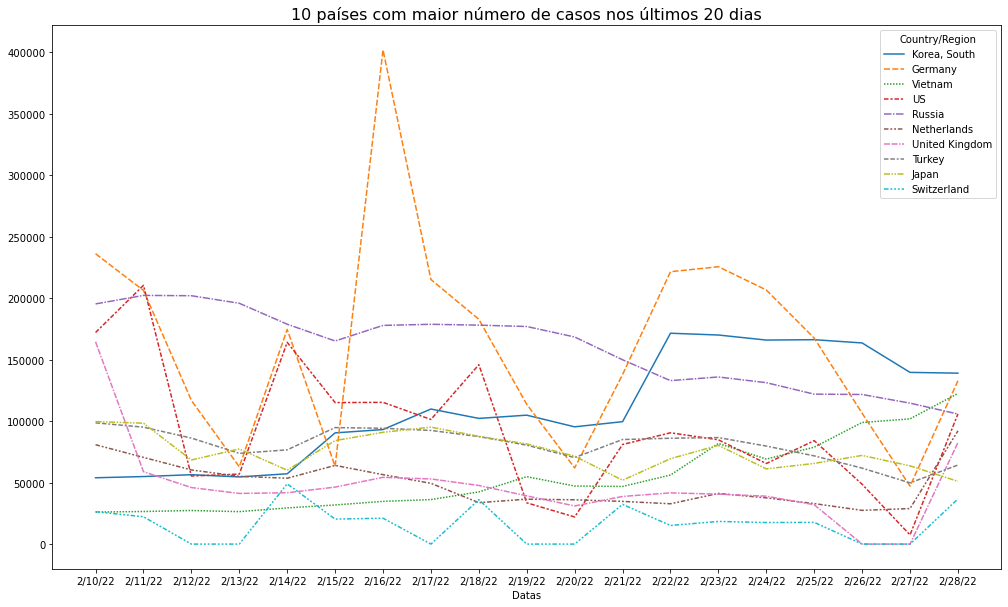

In [43]:
plt.figure(figsize=(17, 10))
plt.title("10 países com maior número de casos nos últimos 20 dias", fontsize=16)
sns.lineplot(data=df_paises_novos_casos.T)